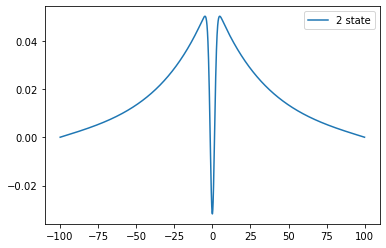

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

def method1():
    xi = -100
    xf = 100
    N = 2000
    dx = (xf - xi)/N


    x = np.linspace(xi, xf, N+1)

    def potential(x):

        v = -0.64*np.exp(-0.1424*(x**2))
        return v

    digonal = 1/(dx**2) + potential(x)[1:-1]
    upper_diagonal = -1/(2*dx**2)*np.ones(len(digonal)-1)

    eigenvalues, eigenstate = eigh_tridiagonal(digonal, upper_diagonal)

    wavefunction = eigenstate.T

    def plot(number_of_state):
        for i in number_of_state:
            plt.plot(x[1:-1], wavefunction[i], label= "{i:} state".format(i= i))
        plt.legend()
        plt.show()

    return plot([2])

method1()

In [158]:
import numpy as np 
import scipy.linalg as sl
import matplotlib.pyplot as plt


    
XI = -50
XF = 50
N = 2500
DELTA_X = (XF -XI)/(N)


X = np.linspace(XI,XF,N+1)[1:-1]


def V_DVR(X):
    v = -0.64*(np.exp(-0.05*(X**2)))

    return np.diag(v)


def T_DVR():
    cons = 1/(2*(DELTA_X**2))
    T_diag =  np.diag(np.ones(N-1)*(cons*((np.pi**2)/3)))
    
    for i in range(N-1):
        for j in range(N-1):
            if i != j:
                T_diag[i,j] = cons*((-1)**(i-j))*(2/(i-j)**2)
    
    return T_diag


def H_DVR():
    h = T_DVR() + V_DVR(X)
    return h


eigenvalues, eigenvectors_matrix = sl.eigh(H_DVR())


def wave_function(state):
    wf = eigenvectors_matrix[:, state]
    return wf
    
#def plot_wave_fun(state):

 #   plt.plot(X, wave_function(state))
  #  plt.show()
#
 #   return None


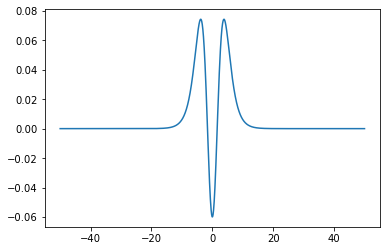

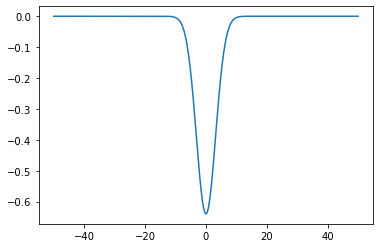

In [170]:
plt.plot(X, wave_function(2))
plt.show()
plt.plot(X, np.diag((V_DVR(X))))

In [161]:
eigenvalues[:22]

array([-0.52294209, -0.30962582, -0.14136718, -0.02900292,  0.0020289 ,
        0.00289197,  0.00827861,  0.01134687,  0.01903834,  0.0249332 ,
        0.03447314,  0.04328384,  0.05459333,  0.06614996,  0.07931698,
        0.09337833,  0.10852648,  0.12488253,  0.14210453,  0.16061413,
        0.17995282,  0.20053972])

# For Morse Potential

In [24]:
import numpy as np 
import scipy.linalg as sl
import matplotlib.pyplot as plt


    
XI = 1
XF = 500
N = 2000
DELTA_X = (XF -XI)/(N)


X = np.linspace(XI,XF,N+1)[1:-1]


def V_DVR(X):
    d = 0.176
    a = 1.4
    xe = 1.02
    v = d*((1-np.exp(-a*(X-xe)))**2)

    return np.diag(v)


def T_DVR():
    cons = 1/(2*(DELTA_X**2))
    T =  np.zeros((N-1,N-1))
    
    for i in range(N-1):
        for j in range(N-1):
            if i == j:
                T[i,j] = cons*((np.pi**2)/3 - 1/(2*((i+1)**2)))
            else:
                T[i,j] = cons*((-1)**(i-j))*((2/(i-j)**2) - (2/(i+j)**2))
    
    return T


def H_DVR():
    h = T_DVR() + V_DVR(X)
    return h


eigenvalues, eigenvectors_matrix = sl.eigh(H_DVR())


def wave_function(state):
    wf = eigenvectors_matrix[:, state]
    return wf
    
def plot_wave_fun(state):

    plt.plot(X, wave_function(state))

    return None

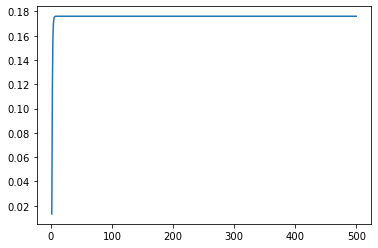

In [28]:
plt.plot(X, np.diag((V_DVR(X))))

In [21]:
eigenvalues

array([1.76501884e-01, 1.78006295e-01, 1.80512832e-01, ...,
       2.00838619e+03, 2.01039821e+03, 2.01240908e+03])

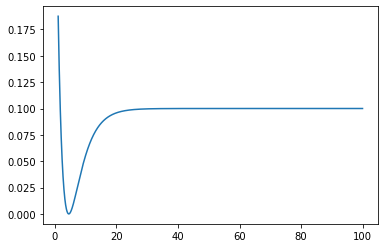

In [7]:
plt.plot(X, np.diag(V_DVR(X)))

In [1]:
import numpy as np

class grid:

    def __init__(self, start, end, n_points) -> None:
        self.x_initial = start
        self.x_final = end
        self.N = n_points
        self.dx = (end - start)/n_points

    def x_values(self):
        x = np.linspace(self.x_initial, self.x_final, self.N + 1)
        return x[1:-1]

In [2]:
g =grid(-10,10,50)

In [3]:
g.x_values()

array([-9.6, -9.2, -8.8, -8.4, -8. , -7.6, -7.2, -6.8, -6.4, -6. , -5.6,
       -5.2, -4.8, -4.4, -4. , -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2,
       -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,
        3.6,  4. ,  4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,
        8. ,  8.4,  8.8,  9.2,  9.6])

In [4]:
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt

class grid:

    def __init__(self, start, end, n_points) -> None:
        self.x_initial = start
        self.x_final = end
        self.N = n_points
        self.dx = (end - start)/n_points

    def x_values(self):
        x = np.linspace(self.x_initial, self.x_final, self.N + 1)
        return x[1:-1]

class for_gaussian:

    def __init__(self, grid) -> None:
        self.x = grid.x_values()
        self.dx = grid.dx
        self.N = grid.N
    
    def V_DVR(self):
        v = -0.64*(np.exp(-0.1424*(self.x**2)))

        return np.diag(v)
    
    def T_DVR(self):
        cons = 1/(2*(self.dx**2))
        T_diag =  np.diag(np.ones(self.N-1)*(cons*((np.pi**2)/3)))
        
        for i in range(self.N-1):
            for j in range(self.N-1):
                if i != j:
                    T_diag[i,j] = cons*((-1)**(i-j))*(2/(i-j)**2)

        return T_diag

    def H_DVR(self):

        return self.T_DVR() + self.V_DVR()

class for_mrorse:

    def __init__(self, grid) -> None:
        self.x = grid.x_values()
        self.dx = grid.dx
        self.N = grid.N
    
    def V_DVR(self):

        d = 0.1
        a = 0.25
        xe = 4.5

        v = d*((1-np.exp(-a*(self.x-xe)))**2)

        return np.diag(v)
    
    def T_DVR(self):
        cons = 1/(2*(self.dx**2))
        T =  np.zeros((self.N-1, self.N-1))
        
        for i in range(self.N-1):
            for j in range(self.N-1):
                if i == j:
                    T[i,j] = cons*((np.pi**2)/3 - 1/(2*((i+1)**2)))
                else:
                    T[i,j] = cons*((-1)**(i-j))*((2/(i-j)**2) - (2/(i+j)**2))
        
        return T

    def H_DVR(self):

        return self.T_DVR() + self.V_DVR()


class eigenval_and_eigenvec:

    def __init__(self, h_matrix) -> None:
        self.H = h_matrix
        self.eigenvalues, self.eigenvector_matrix = sl.eigh(h_matrix)
    
    def get_eigenvalues(self):
        return self.eigenvalues
    
    def get_eigenvactor_matrix(self):
        return self.eigenvector_matrix
    
    def get_wavefunction(self, state):
        return self.get_eigenvactor_matrix()[:,state]


def eigenvalues(type_of_potential):

    if type_of_potential == 'morse':
        g = grid(start = 1, end = 100, n_points = 1000)
        x = g.x_values()
        h = for_mrorse(g).H_DVR()
        eigval = eigenval_and_eigenvec(h).get_eigenvalues()

        return eigval
    
    if type_of_potential == 'gaussian':
        g = grid(start = -50, end = 50, n_points = 1000)
        x = g.x_values()
        h = for_gaussian(g).H_DVR()
        eigval = eigenval_and_eigenvec(h).get_eigenvalues()

        return eigval

def plot_(state, type_of_potential):

    if type_of_potential == 'morse':
        g = grid(start = 1, end = 100, n_points = 1000)
        x = g.x_values()
        h = for_mrorse(g).H_DVR()

        wave_fun = eigenval_and_eigenvec(h).get_wavefunction(state)

        plt.plot(x, wave_fun)

        return None
    
    elif type_of_potential == 'gaussian':
        g = grid(start = -50, end = 50, n_points = 1000)
        x = g.x_values()
        h = for_gaussian(g).H_DVR()

        wave_fun = eigenval_and_eigenvec(h).get_wavefunction(state)

        plt.plot(x, wave_fun)

        return None


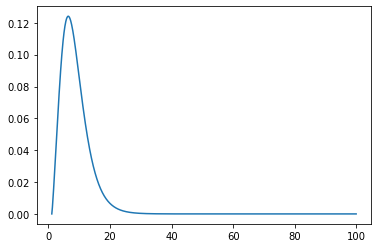

In [10]:
plot(0, 'morse')

In [11]:
eigenvalues('morse')

array([5.48418481e-02, 9.91531805e-02, 1.01078527e-01, 1.03665085e-01,
       1.07485573e-01, 1.12473092e-01, 1.18591227e-01, 1.25815044e-01,
       1.34125709e-01, 1.43508398e-01, 1.53951272e-01, 1.65444825e-01,
       1.77981407e-01, 1.91554846e-01, 2.06160153e-01, 2.21793283e-01,
       2.38450953e-01, 2.56130491e-01, 2.74829721e-01, 2.94546868e-01,
       3.15280480e-01, 3.37029375e-01, 3.59792584e-01, 3.83569315e-01,
       4.08358922e-01, 4.34160874e-01, 4.60974739e-01, 4.88800161e-01,
       5.17636850e-01, 5.47484567e-01, 5.78343116e-01, 6.10212335e-01,
       6.43092093e-01, 6.76982279e-01, 7.11882803e-01, 7.47793588e-01,
       7.84714572e-01, 8.22645701e-01, 8.61586931e-01, 9.01538223e-01,
       9.42499545e-01, 9.84470869e-01, 1.02745217e+00, 1.07144343e+00,
       1.11644462e+00, 1.16245573e+00, 1.20947674e+00, 1.25750765e+00,
       1.30654843e+00, 1.35659907e+00, 1.40765956e+00, 1.45972990e+00,
       1.51281007e+00, 1.56690005e+00, 1.62199985e+00, 1.67810944e+00,
      

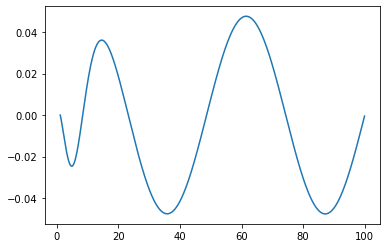

In [13]:
plot(4, 'morse')